In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import fastparquet as fp
import matplotlib.pyplot as plt
import sklearn.model_selection as skms
import src.helper.helper as hlp
import src.helper.const as const


In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ths/miniconda3/envs

In [2]:
# Config
FILE_DIR = "./"
DATA_DIR = FILE_DIR + "../data/interim/"
POSTER_DIR = DATA_DIR + "posters/"

In [3]:
# Init
pd.set_option('display.max_colwidth', None)

GENRE_COLS = const.GENRE_OHE_COLS

In [4]:
# Helper functions
def plot_gen_distribution(df: pd.DataFrame, cols=GENRE_COLS, topic: str = None):
    if topic == None:
        print(f"Genre distribution for {len(df)} datasets")
    else:
        print(f"Genre distribution for {len(df)} {topic} datasets")

    # Plot distribution values
    for col in cols:
        print(f"{col}: {df[col].value_counts()[1]/len(df):>{25 - len(col)}.4f}")

    # Plot correlation matrix
    print()
    hlp.plot_correlations(df, num_cols=GENRE_COLS, figsize=(18, 11))

In [5]:
# Load training datasets
df = pd.read_parquet(DATA_DIR + 'df_train_v1.gzip')

Genre distribution for 18383 datasets
x0_Action:           0.0544
x0_Adventure:        0.0544
x0_Animation:        0.0544
x0_Comedy:           0.0544
x0_Crime:            0.0544
x0_Documentary:      0.0544
x0_Drama:            0.0544
x0_Family:           0.0543
x0_Fantasy:          0.0543
x0_History:          0.0544
x0_Horror:           0.0544
x0_Music:            0.0544
x0_Mystery:          0.0544
x0_Romance:          0.0544
x0_Science Fiction:  0.0543
x0_TV Movie:         0.0543
x0_Thriller:         0.0544
x0_War:              0.0544
x0_Western:          0.0544



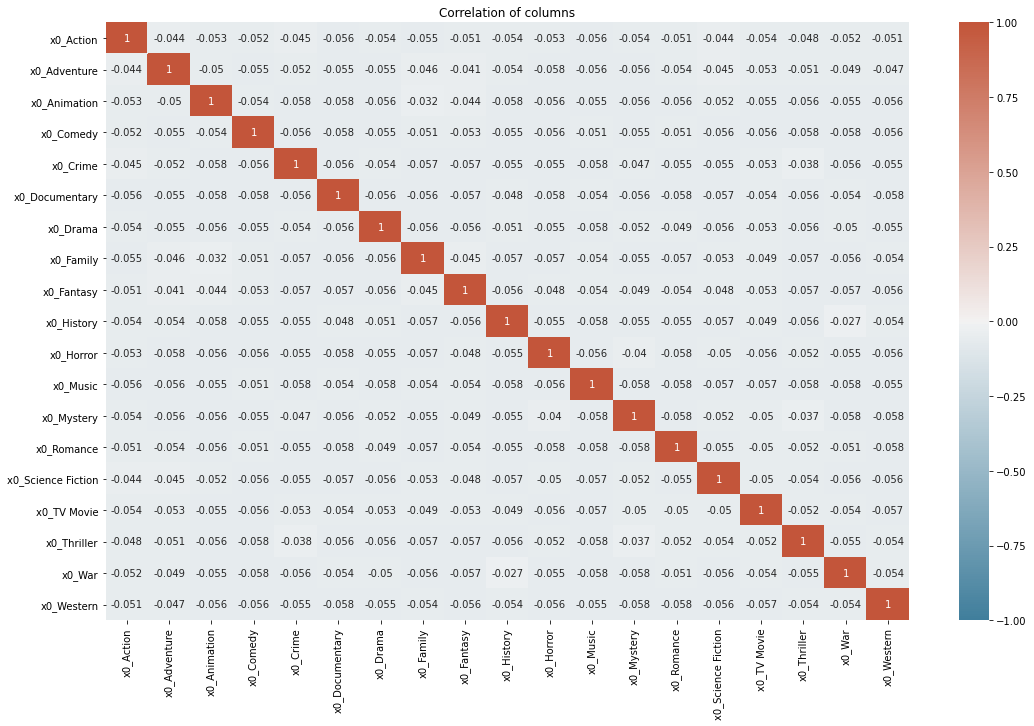

In [6]:
# Show distribution of datasets
plot_gen_distribution(df)

Genre distribution for 3677 Test datasets
x0_Action:           0.0503
x0_Adventure:        0.0530
x0_Animation:        0.0560
x0_Comedy:           0.0525
x0_Crime:            0.0574
x0_Documentary:      0.0536
x0_Drama:            0.0530
x0_Family:           0.0590
x0_Fantasy:          0.0582
x0_History:          0.0484
x0_Horror:           0.0601
x0_Music:            0.0579
x0_Mystery:          0.0642
x0_Romance:          0.0547
x0_Science Fiction:  0.0536
x0_TV Movie:         0.0500
x0_Thriller:         0.0503
x0_War:              0.0530
x0_Western:          0.0479



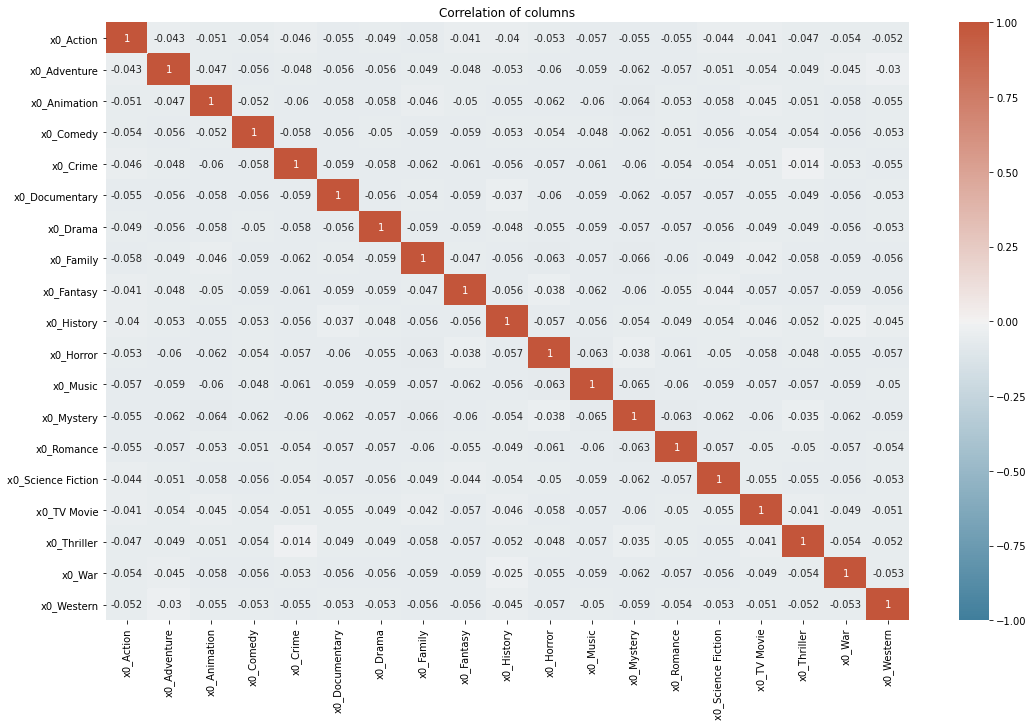

In [7]:
# Test-Split
df_train_eval, df_test = skms.train_test_split(df, test_size=0.2, random_state=const.SEED)
plot_gen_distribution(df_test, topic="Test")

Genre distribution for 11764 Train datasets
x0_Action:           0.0550
x0_Adventure:        0.0553
x0_Animation:        0.0539
x0_Comedy:           0.0543
x0_Crime:            0.0514
x0_Documentary:      0.0545
x0_Drama:            0.0553
x0_Family:           0.0527
x0_Fantasy:          0.0536
x0_History:          0.0566
x0_Horror:           0.0531
x0_Music:            0.0549
x0_Mystery:          0.0524
x0_Romance:          0.0538
x0_Science Fiction:  0.0550
x0_TV Movie:         0.0552
x0_Thriller:         0.0555
x0_War:              0.0558
x0_Western:          0.0549



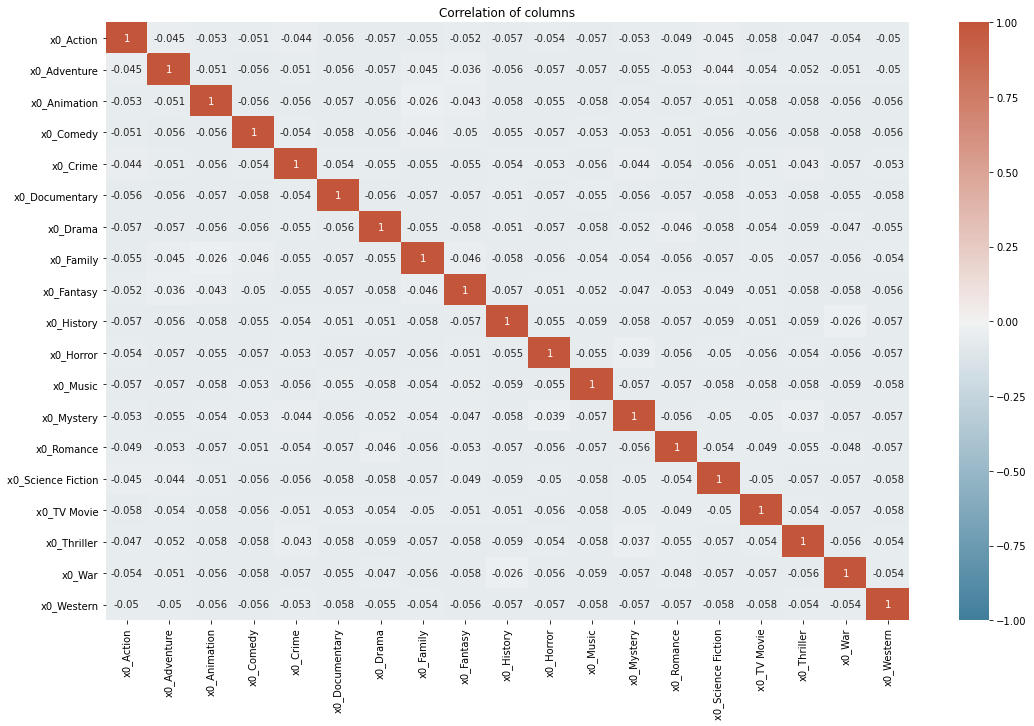


Genre distribution for 3677 Eval datasets
x0_Action:           0.0503
x0_Adventure:        0.0530
x0_Animation:        0.0560
x0_Comedy:           0.0525
x0_Crime:            0.0574
x0_Documentary:      0.0536
x0_Drama:            0.0530
x0_Family:           0.0590
x0_Fantasy:          0.0582
x0_History:          0.0484
x0_Horror:           0.0601
x0_Music:            0.0579
x0_Mystery:          0.0642
x0_Romance:          0.0547
x0_Science Fiction:  0.0536
x0_TV Movie:         0.0500
x0_Thriller:         0.0503
x0_War:              0.0530
x0_Western:          0.0479



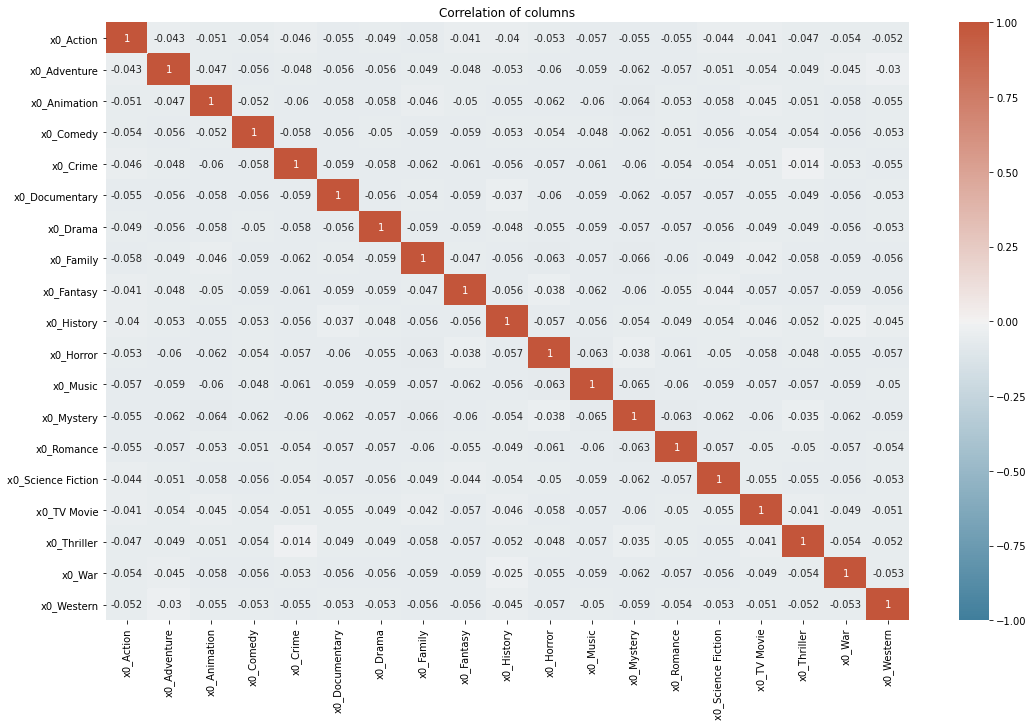

In [8]:
# Train-Eval-Split
df_train, df_eval = skms.train_test_split(df_train_eval, test_size=0.2, random_state=const.SEED)
plot_gen_distribution(df_train, topic="Train")
print()
plot_gen_distribution(df_test, topic="Eval")

In [9]:
# Write splits to file
df_train.to_parquet(DATA_DIR + f'df_train-split_v1.gzip', compression='gzip')
df_eval.to_parquet(DATA_DIR + f'df_eval-split_v1.gzip', compression='gzip')
df_test.to_parquet(DATA_DIR + f'df_test-split_v1.gzip', compression='gzip')